* **Link for data**
* https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge?select=train.csv

* **Links for coding clues**
* https://www.kaggle.com/code/abhinavjhanwar/house-price-prediction-r2-score-94
* https://www.jigsawacademy.com/popular-regression-algorithms-ml/ - list of useful models
* https://www.kaggle.com/code/tanujmathur98/best-model-for-indian-house-price-prediction

# Attributes Description

* POSTED_BY :	Category marking who has listed the property
* UNDER_CONSTRUCTION :	Under Construction or Not
* RERA :	Rera approved or Not
* BHK_NO :	Number of Rooms
* BHKORRK :	Type of property
* SQUARE_FT :	Total area of the house in square feet
* READYTOMOVE :	Category marking Ready to move or Not
* RESALE :	Category marking Resale or not
* ADDRESS : 	Address of the property
* LONGITUDE :	Longitude of the property
* LATITUDE :	Latitude of the property


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [48]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [49]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [50]:
sample.value_counts()

TARGET(PRICE_IN_LACS)
0.0                      68720
dtype: int64

# Data Visualisation

Text(0.5, 1.0, 'Test dataset')

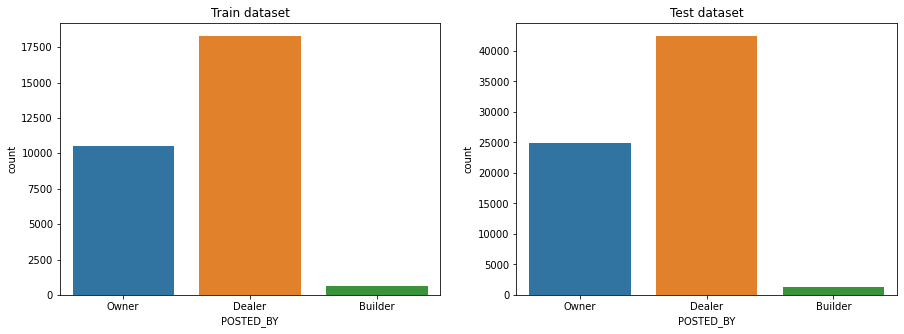

In [51]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='POSTED_BY',data=train,ax=axes[0])
axes[0].set_title('Train dataset')
sns.countplot(x='POSTED_BY',data=test,ax=axes[1])
axes[1].set_title('Test dataset')

Text(0.5, 1.0, 'Test dataset')

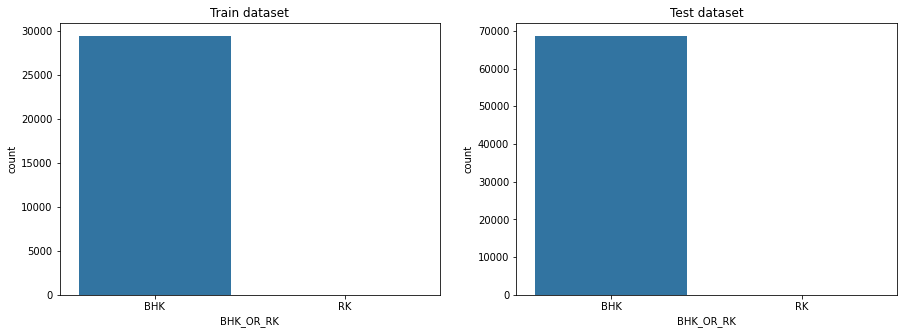

In [52]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='BHK_OR_RK',data=train,ax=axes[0])
axes[0].set_title('Train dataset')
sns.countplot(x='BHK_OR_RK',data=test,ax=axes[1])
axes[1].set_title('Test dataset')

Text(0.5, 1.0, 'Test dataset')

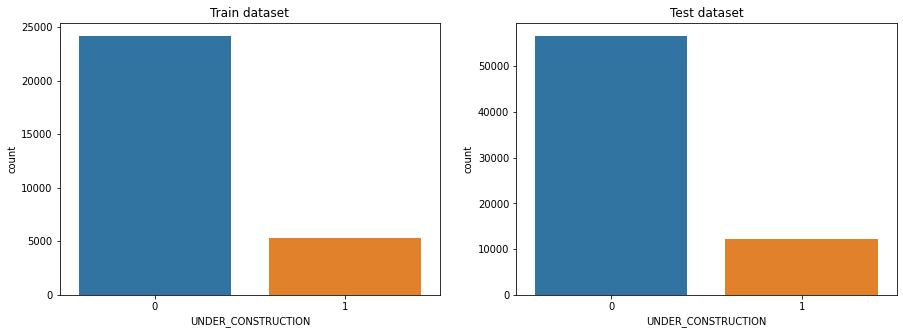

In [53]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='UNDER_CONSTRUCTION',data=train,ax=axes[0])
axes[0].set_title('Train dataset')
sns.countplot(x='UNDER_CONSTRUCTION',data=test,ax=axes[1])
axes[1].set_title('Test dataset')

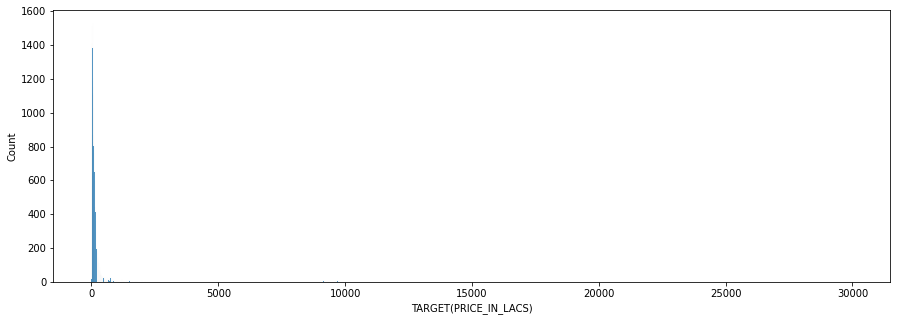

In [54]:
plt.figure(figsize=(15,5))
sns.histplot(x='TARGET(PRICE_IN_LACS)',data=train)

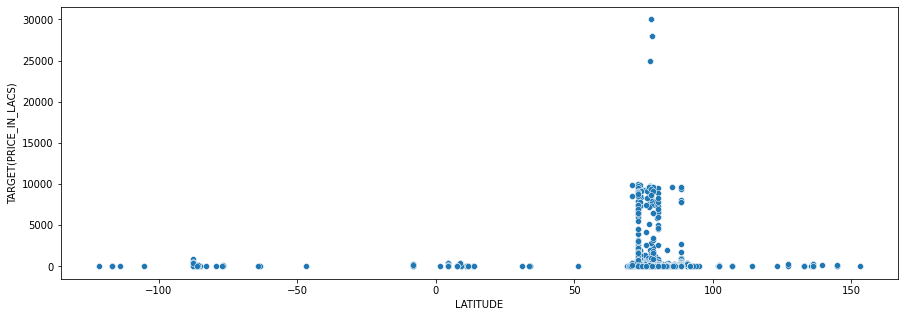

In [55]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='LATITUDE',y='TARGET(PRICE_IN_LACS)')

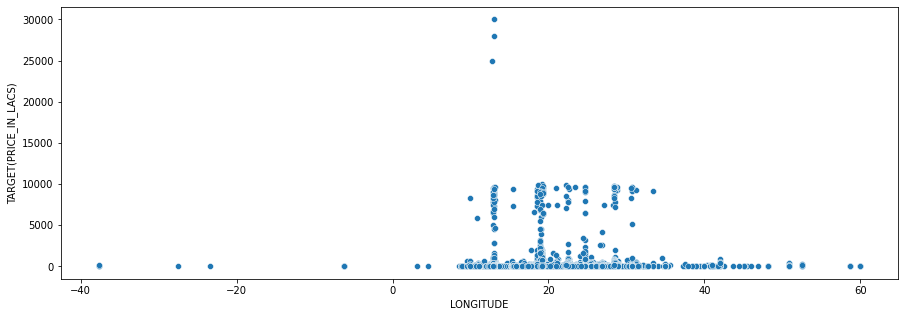

In [56]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='LONGITUDE',y='TARGET(PRICE_IN_LACS)')

# Data Cleaning

In [57]:
train.drop('ADDRESS',axis=1,inplace=True)
test.drop('ADDRESS',axis=1,inplace=True)

In [58]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [59]:
test.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [60]:
train = pd.get_dummies(train,columns=['POSTED_BY','BHK_OR_RK'])

# Model Application

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [62]:
X = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = train['TARGET(PRICE_IN_LACS)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Linear Regression

In [63]:
linmodel = LinearRegression()

linmodel.fit(X_train,y_train)
pred_lin = linmodel.predict(X_test)
train_pred_lin = linmodel.predict(X_train)

print(r2_score(y_test,pred_lin))
print(mean_squared_error(y_test,pred_lin)**0.5)

0.07294890032375434
546.3496040880481


## Decision Tree Regressor

In [64]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
train_pred_dtree = dtree.predict(X_train)

print(r2_score(y_test,pred_dtree))
print(mean_squared_error(y_test,pred_dtree)**0.5)

0.9201507699548676
160.34453494840562


## Random Forest Regressor

In [65]:
rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)
train_pred_rfr = rfr.predict(X_train)

print(r2_score(y_test,pred_rfr))
print(mean_squared_error(y_test,pred_rfr)**0.5)

0.9461927567016815
131.62523731854446


## K Nearest Neighbors Regressor

In [66]:
knn = KNeighborsRegressor(n_neighbors=1)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn.fit(scaled_X_train,y_train)
pred_knn = knn.predict(scaled_X_test)
train_pred_knn = knn.predict(scaled_X_train)

print(r2_score(y_test,pred_knn))
print(mean_squared_error(y_test,pred_knn)**0.5)

0.5495430082435857
380.8425479877744


In [67]:
scores = []

for i in range(1,16):
    kni = KNeighborsRegressor(n_neighbors=i)
    kni.fit(scaled_X_train,y_train)
    pred_kni = kni.predict(scaled_X_test)
    scores.append(r2_score(y_test,pred_kni))


Text(0, 0.5, 'r2_score')

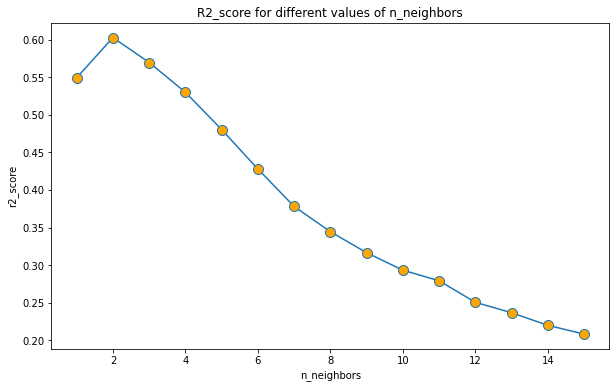

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),scores,markersize=10,marker='o',markerfacecolor='orange')
plt.title('R2_score for different values of n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('r2_score')

In [69]:
knr = KNeighborsRegressor(n_neighbors=2)

knr.fit(scaled_X_train,y_train)
pred_knr = knr.predict(scaled_X_test)
train_pred_knr = knr.predict(scaled_X_train)

print(r2_score(y_test,pred_knr))
print(mean_squared_error(y_test,pred_knr)**0.5)

0.6029784945348547
357.5409682491651


## Support Vector Machines Regressor

In [70]:
svr = SVR(kernel='poly')

svr.fit(scaled_X_train,y_train)
pred_svr = svr.predict(scaled_X_test)
train_pred_svr = svr.predict(scaled_X_train)

print(r2_score(y_test,pred_svr))
print(mean_squared_error(y_test,pred_svr)**0.5)

-0.0005866326576664527
567.6049109100675


In [71]:
# param_grid = {'C': [1e4,1e5,1e6], 'gamma': [1e-4,1e-5,1e-6]}

# grid = GridSearchCV(SVR(kernel='poly'),param_grid,refit=True,verbose=2)
# grid.fit(scaled_X_train,y_train)

## Neural Networks

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [73]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [74]:
model.fit(scaled_X_train,
          y_train,
          batch_size=256,
          epochs=100,
          validation_data=(scaled_X_test,y_test))

Epoch 1/100
81/81 [==============================] - 1s 5ms/step - loss: 499654.5312 - val_loss: 340119.2188
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 499274.9375 - val_loss: 339698.4688
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 498552.4062 - val_loss: 338949.4688
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 497520.2500 - val_loss: 337684.3125
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 495641.3438 - val_loss: 335441.8438
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 492017.7812 - val_loss: 331492.9688
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 486791.2188 - val_loss: 326218.8750
Epoch 8/100
81/81 [==============================] - 0s 3ms/step - loss: 479469.2500 - val_loss: 320497.0938
Epoch 9/100
81/81 [==============================] - 0s 3ms/step - loss: 472092.7500 - val_loss: 315243.2812
Epoch 10/100
81/81 

(0.0, 100.0)

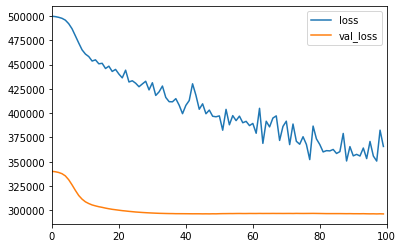

In [75]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.xlim(0,100)

In [76]:
pred_nn = model.predict(scaled_X_test)
train_pred_nn = model.predict(scaled_X_train)

print(r2_score(y_test,pred_nn))
print(mean_squared_error(y_test,pred_nn)**0.5)

0.0797484845505323
544.3422782772492


# Results

In [79]:
lin1 = r2_score(y_test,pred_lin)*100
dtr1 = r2_score(y_test,pred_dtree)*100
rfr1 = r2_score(y_test,pred_rfr)*100
knn1 = r2_score(y_test,pred_knn)*100
knr1 = r2_score(y_test,pred_knr)*100
svr1 = r2_score(y_test,pred_svr)*100
nn1 = r2_score(y_test,pred_nn)*100

lin2 = r2_score(y_train,train_pred_lin)*100
dtr2 = r2_score(y_train,train_pred_dtree)*100
rfr2 = r2_score(y_train,train_pred_rfr)*100
knn2 = r2_score(y_train,train_pred_knn)*100
knr2 = r2_score(y_train,train_pred_knr)*100
svr2 = r2_score(y_train,train_pred_svr)*100
nn2 = r2_score(y_train,train_pred_nn)*100

test_score_dict = {'Linear Regression':lin1,'Decision Tree Classifier':dtr1,'Random Forest Classifier':rfr1,
              'KNR (n=1)':knn1,'KNR (n=2)':knr1,'Support Vector Machines':svr1,'Neural Networks':nn1}
              
train_score_dict = {'Linear Regression':lin2,'Decision Tree Classifier':dtr2,'Random Forest Classifier':rfr2,
              'KNR (n=1)':knn2,'KNR (n=2)':knr2,'Support Vector Machines':svr2,'Neural Networks':nn2}

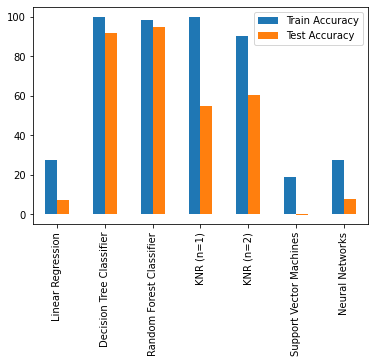

In [80]:
df_scores = pd.DataFrame([train_score_dict,test_score_dict],index=['Train Accuracy','Test Accuracy']).transpose()

df_scores.plot(kind='bar')